<a href="https://colab.research.google.com/github/juancuevas-ops/analisis-molecular-covid19/blob/main/covid19_se_comporta_como_bacteria_juan_cuevasv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Bio

     |████████████████████████████████| 81kB 3.4MB/s 
     |████████████████████████████████| 2.3MB 8.0MB/s 


In [2]:
from Bio import SeqIO

In [3]:
covid =  SeqIO.read("/content/covid_19.fasta","fasta")
bacteria = SeqIO.read("/content/bacteria.fasta","fasta")

In [4]:
covid

SeqRecord(seq=Seq('ATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGA...AAA'), id='NC_004718.3', name='NC_004718.3', description='NC_004718.3 SARS coronavirus Tor2, complete genome', dbxrefs=[])

In [5]:
bacteria

SeqRecord(seq=Seq('MKLKNQDKHQSFSSNAKVDKISTDSLKNETDIELQNINHEDCLKMSEYENVEPF...RNM'), id='AAP86782.1', name='AAP86782.1', description='AAP86782.1 Cry1I [Bacillus thuringiensis]', dbxrefs=[])

In [6]:
covid_seq = covid.seq

In [7]:
bacteria_seq = bacteria.seq

In [9]:
print("covid_seq ::",len(covid_seq))
print("bacteria_seq ::",len(bacteria_seq))

covid_seq :: 29751
bacteria_seq :: 719


In [11]:
from Bio.SeqUtils import GC #cual es mas estable

In [12]:
print("GC contenido de covid_seq ::",GC(covid_seq))
print("GC contenido de bacteria_seq ::",GC(bacteria_seq)) #37% de similitud en este dato

GC contenido de covid_seq :: 40.7616550704178
GC contenido de bacteria_seq :: 14.881780250347704


covid es mas estable que la bacteria Bacillus thuringiensis con 40.76

NOTA: En genética, GC, Contenido GC o Porcentaje GC (contenido de guanina y citosina) es una característica del genoma de un organismo o de cualquier pedazo de ADN o ARN. G y C denotan guanina y citosina, respectivamente. Expresado generalmente como porcentaje, representa la cantidad de pares Guanina-Citosina en la molécula de ADN o genoma que está siendo investigado. La fracción restante de cualquier molécula de ADN contendrá bases A (adenina) y T (timina), de forma que el contenido GC da también el contenido AT (por ejemplo, un GC del 58% implica un contenido AT del 42%).1​ Los pares GC en el ADN están conectados por tres enlaces de hidrógeno en vez de dos de los pares AT. Esto hace el enlace GC más fuerte y más resistente a la desnaturalización por efecto de la temperatura por lo que el contenido GC tiende así a ser mayor en los hipertermófilos.

El contenido GC se utiliza a veces para clasificar organismos en taxonomía. Por ejemplo, las Actinobacteria se caracterizan por ser “bacterias de GC alto”. En Streptomyces coelicolor el GC es del 72%, en la levadura Saccharomyces cerevisiae del 38%, mientras que en el organismo modelo Arabidopsis thaliana es del 36%. y en este primer acercamiento podemos ver al virus covid con porcentaje muy cercano a las bacterias

ahora veremos el proceso de traslacion

In [20]:
covid_protein = covid_seq.translate()
covid_protein

Seq('ILGFYLPRKSQPTSISCRSVL*TNFKICVAVARLHA*CTYAV*TIINFTVVDKK...KKK')

In [ ]:
bacteria_protein = bacteria_seq.translate()# Codon 'MKL' is invalid 1 error se debe analizar

In [26]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [28]:
covid_analysed = ProteinAnalysis(str(covid_protein))
bacteria_analysed = ProteinAnalysis(str(bacteria_seq))

In [30]:
covid_analysed
bacteria_analysed

veremos la frecuencia de aminoacidos

In [31]:
covid_analysed.count_amino_acids()

{'A': 575,
 'C': 313,
 'D': 320,
 'E': 365,
 'F': 437,
 'G': 438,
 'H': 298,
 'I': 566,
 'K': 503,
 'L': 1368,
 'M': 365,
 'N': 418,
 'P': 314,
 'Q': 388,
 'R': 417,
 'S': 737,
 'T': 689,
 'V': 683,
 'W': 110,
 'Y': 341}

In [32]:
bacteria_analysed.count_amino_acids()

{'A': 44,
 'C': 2,
 'D': 34,
 'E': 43,
 'F': 37,
 'G': 44,
 'H': 19,
 'I': 42,
 'K': 31,
 'L': 62,
 'M': 11,
 'N': 47,
 'P': 29,
 'Q': 29,
 'R': 35,
 'S': 61,
 'T': 58,
 'V': 47,
 'W': 12,
 'Y': 32}

In [37]:
from collections import Counter
Counter(covid_protein).most_common(10)#las 10 proteinas mas comunes

[('L', 1368),
 ('S', 737),
 ('T', 689),
 ('V', 683),
 ('A', 575),
 ('I', 566),
 ('K', 503),
 ('G', 438),
 ('F', 437),
 ('N', 418)]

In [39]:
covid_freq = Counter(covid_protein)
covid_freq

Counter({'*': 272,
         'A': 575,
         'C': 313,
         'D': 320,
         'E': 365,
         'F': 437,
         'G': 438,
         'H': 298,
         'I': 566,
         'K': 503,
         'L': 1368,
         'M': 365,
         'N': 418,
         'P': 314,
         'Q': 388,
         'R': 417,
         'S': 737,
         'T': 689,
         'V': 683,
         'W': 110,
         'Y': 341})

In [40]:
bacteria_freq = Counter(bacteria_seq)
bacteria_freq

Counter({'A': 44,
         'C': 2,
         'D': 34,
         'E': 43,
         'F': 37,
         'G': 44,
         'H': 19,
         'I': 42,
         'K': 31,
         'L': 62,
         'M': 11,
         'N': 47,
         'P': 29,
         'Q': 29,
         'R': 35,
         'S': 61,
         'T': 58,
         'V': 47,
         'W': 12,
         'Y': 32})

In [36]:
Counter(bacteria_seq).most_common(10)

[('L', 62),
 ('S', 61),
 ('T', 58),
 ('N', 47),
 ('V', 47),
 ('A', 44),
 ('G', 44),
 ('E', 43),
 ('I', 42),
 ('F', 37)]

<BarContainer object of 21 artists>

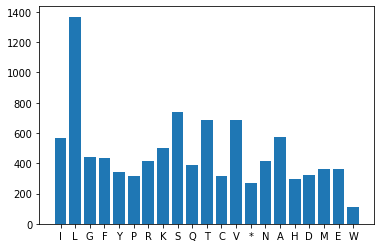

In [41]:
import numpy as np
import matplotlib.pyplot as plt
plt.bar(covid_freq.keys(), covid_freq.values())#grafico de la frecuencia de proteinas

<BarContainer object of 20 artists>

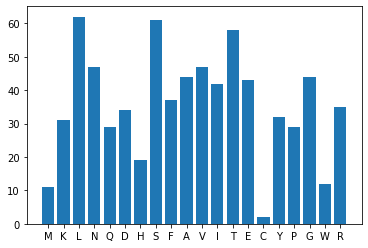

In [43]:
plt.bar(bacteria_freq.keys(), bacteria_freq.values())#grafico de la frecuencia de proteinaas de la bacteria

Tipos de alineación Alineación global: encuentra la mejor concordancia / acuerdo entre todos los caracteres en dos secuencias Alineación local: encuentra solo las subsecuencias que se alinean mejor

In [49]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

cov_n_bact = pairwise2.align.globalxx(covid_seq[0:100],bacteria_seq[0:100],one_alignment_only=True,score_only=True)

In [50]:
print(cov_n_bact)

18.0


In [73]:
#3D Structure
from Bio.PDB import PDBParser,MMCIFParser#grafico de porcentaje  concordancia 
#entre una bacteria escogida al azar como lo es Bacillus thuringiensis y el virus covid19

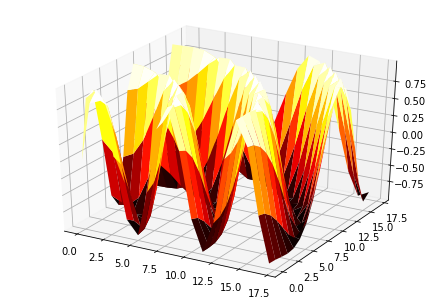

In [70]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(18.0)
Y = np.arange(18.0)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')

Conclusion el virud covid 19 se puede tratar con antibioticos como cualquier bacteria peligrosa en el organismo humana... esta investigacion es solo inicial para lo cual se relizaran analisis con bacteria que producen los mismos sintomas que el covid19.....saludos
CREADO POR JUAN CUEVAS VASQUEZ.